# Part 3 - Feature Engineering

In [1]:
# Load Packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

In [2]:
# Load dataset

df = pd.read_csv('Part_2.csv')

display(df.head())

loan_status  loan_amnt  term  int_rate  installment sub_grade  emp_length  \
0            1     5000.0    36     10.65       162.87        B2        10.0   
1            0     2500.0    60     15.27        59.83        C4         0.0   
2            1     2400.0    36     15.96        84.33        C5        10.0   
3            1    10000.0    36     13.49       339.31        C1        10.0   
4            1     3000.0    60     12.69        67.79        B5         1.0   

  home_ownership  annual_inc verification_status  ... earliest_cr_line  \
0           RENT     24000.0            Verified  ...       1985-01-01   
1           RENT     30000.0     Source Verified  ...       1999-04-01   
2           RENT     12252.0        Not Verified  ...       2001-11-01   
3           RENT     49200.0     Source Verified  ...       1996-02-01   
4           RENT     80000.0     Source Verified  ...       1996-01-01   

  fico_range_low fico_range_high  inq_last_6mths  open_acc pub_rec  revol_bal  \
0          735.0           739.0             1.0       3.0     0.0    13648.0   
1          740.0           744.0             5.0       3.0     0.0     1687.0   
2          735.0           739.0             2.0       2.0     0.0     2956.0   
3          690.0           694.0             1.0      10.0     0.0     5598.0   
4          695.0           699.0             0.0      15.0     0.0    27783.0   

   revol_util  total_acc  pub_rec_bankruptcies  
0        83.7        9.0                   0.0  
1         9.4        4.0                   0.0  
2        98.5       10.0                   0.0  
3        21.0       37.0                   0.0  
4        53.9       38.0                   0.0  

[5 rows x 25 columns]

In [3]:
df.shape

(39786, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_status           39786 non-null  int64  
 1   loan_amnt             39786 non-null  float64
 2   term                  39786 non-null  int64  
 3   int_rate              39786 non-null  float64
 4   installment           39786 non-null  float64
 5   sub_grade             39786 non-null  object 
 6   emp_length            39786 non-null  float64
 7   home_ownership        39786 non-null  object 
 8   annual_inc            39786 non-null  float64
 9   verification_status   39786 non-null  object 
 10  issue_d               39786 non-null  object 
 11  purpose               39786 non-null  object 
 12  addr_state            39786 non-null  object 
 13  dti                   39786 non-null  float64
 14  delinq_2yrs           39786 non-null  float64
 15  earliest_cr_line   

## Categorization of the 'fico_range_low', and 'fico_range_high' factors.

In [5]:
df[['fico_range_low', 'fico_range_high']].describe()

fico_range_low  fico_range_high
count    39786.000000     39786.000000
mean       714.997989       718.997989
std         35.840682        35.840682
min        625.000000       629.000000
25%        685.000000       689.000000
50%        710.000000       714.000000
75%        740.000000       744.000000
max        825.000000       829.000000

In [6]:
# Pearson correlation

df[['fico_range_low','fico_range_high']].corr()

fico_range_low  fico_range_high
fico_range_low              1.0              1.0
fico_range_high             1.0              1.0

Both indicators are not needed, one average is enough: 'fico_score'

In [7]:
df['fico_score'] = 0.5 * df['fico_range_low'] + 0.5 * df['fico_range_high']

In [8]:
df.drop(['fico_range_low', 'fico_range_high'], axis=1, inplace=True)

In [9]:
df['fico_score'].describe()

count    39786.000000
mean       716.997989
std         35.840682
min        627.000000
25%        687.000000
50%        712.000000
75%        742.000000
max        827.000000
Name: fico_score, dtype: float64

In [10]:
# Function for plots - 'plots1'

name = df.columns

def plots1(df, name):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (13, 5))

    #boxplot
    sns.boxplot(x = name, data = df, orient = 'v', ax = ax1)
    ax1.set_ylabel('Value', fontsize = 15)
    ax1.set_title('Distribution of value', fontsize = 15)
    ax1.tick_params(labelsize = 15)

    #distplot
    sns.distplot(df[name], ax = ax2)
    ax2.set_xlabel('Value', fontsize = 15)
    ax2.set_ylabel('Distribution of value', fontsize = 15)
    ax2.set_title('Distplot', fontsize = 15)
    ax2.tick_params(labelsize = 15)

    #histogram
    ax3.hist(df[name])
    ax3.set_xlabel('value', fontsize = 15)
    ax3.set_ylabel('Number of values', fontsize = 15)
    ax3.set_title('Histogram', fontsize = 15)
    ax3.tick_params(labelsize = 15)

    plt.subplots_adjust(wspace = 0.5)
    plt.tight_layout()

In [11]:
# Function for calculating the value difference between .max and .min - 'range'

name = df.columns

def range_v(df, name):
    x = df[name].max() - df[name].min()
    return x

In [12]:
# Function for calculating Quartiles - 'quartiles'

name = df.columns

def quartiles(df, name):
    Q1 = df[name].quantile(q = 0.25)
    Q3 = df[name].quantile(q = 0.75)
    return Q1, Q3, stats.iqr(df[name])

In [13]:
# Function for outlier detection from Interquartile range (IQR) in original data - 'l_u'

# IQR=Q3-Q1
#lower 1.5 * IQR whisker i.e Q1 - 1.5*IQR
#upper 1.5 * IQR whisker i.e Q3 + 1.5*IQR

def l_u(df, name):
    Q1 = df[name].quantile(q = 0.25)
    Q3 = df[name].quantile(q = 0.75)
    L_outliers = Q1 - 1.5 * (Q3 - Q1)
    U_outliers = Q3 + 1.5 * (Q3-Q1)
    return L_outliers, U_outliers

In [14]:
# Function for calculating number and percetage of ouliers - 'outliers'

name = df.columns

def outliers(df, name):
    Q1 = df[name].quantile(q = 0.25)
    Q3 = df[name].quantile(q = 0.75)
    (L_outliers, U_outliers) = l_u(df, name)
    a = df[df[name] > U_outliers][name].count()
    b = df[df[name] < L_outliers][name].count()
    c = round(df[df[name] > U_outliers][name].count() * 100 / len(df))
    d = round(df[df[name] < L_outliers][name].count() * 100 / len(df))
    return a, b, c, d

C:\Users\barte\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\barte\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


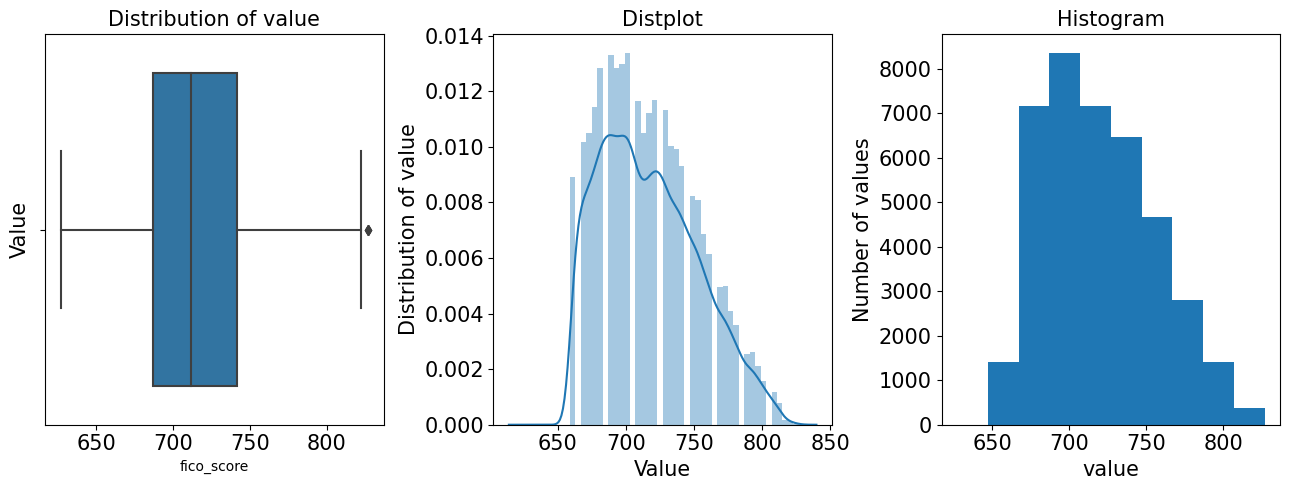

In [15]:
# Plots

plots1(df, 'fico_score')

In [16]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'fico_score'))
print('L_outliers, U_outliers: ', l_u(df, 'fico_score'))
print('Q1, Q3, IQR: ', quartiles(df, 'fico_score'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'fico_score'))

Range of values:  200.0
L_outliers, U_outliers:  (604.5, 824.5)
Q1, Q3, IQR:  (687.0, 742.0, 55.0)
No.U_outliers, No.L_outliers, %U, %L:  (3, 0, 0, 0)


In [17]:
# Converting float to integer

df['fico_score'] = df['fico_score'].astype(int, errors = 'raise')

In [18]:
# Function that converts fico into categories

fico_score = df['fico_score']

def fico_rate(fico_score):
        if fico_score < 580:
            fico_score = 'Poor'
        elif fico_score >= 600 and fico_score < 670:
            fico_score = 'Fair'
        elif fico_score >= 670 and fico_score < 740:
            fico_score = 'Good'
        elif fico_score >= 740 and fico_score < 800:
            fico_score = 'Very Good'
        elif fico_score >= 800:
            fico_score = 'Exceptional'
        return fico_score

In [19]:
df['fico_rating'] = df.fico_score.apply(fico_rate)

In [20]:
df['fico_rating'].value_counts()

Good           26021
Very Good      10112
Fair            3039
Exceptional      614
Name: fico_rating, dtype: int64

In [21]:
fico_rating = df['fico_score']

def fico_rate_no(fico_rating):
        if fico_rating == 'Fair':
            fico_rating = 0
        elif fico_rating == 'Good':
            fico_rating = 1
        elif fico_rating == 'Very Good':
            fico_rating = 2
        elif fico_rating == 'Exceptional':
            fico_rating = 3
        return fico_rating

In [22]:
df['fico_class'] = df.fico_rating.apply(fico_rate_no)

In [23]:
df['fico_class'].value_counts()

1    26021
2    10112
0     3039
3      614
Name: fico_class, dtype: int64

In [24]:
df.groupby('loan_status')['fico_class'].describe()

count      mean       std  min  25%  50%  75%  max
loan_status                                                      
0             5670.0  1.045855  0.544392  0.0  1.0  1.0  1.0  3.0
1            34116.0  1.235696  0.593575  0.0  1.0  1.0  2.0  3.0

More loans with Fully Paid 'loan_status' have Category 2. 

## Columns which are objects (the numbering continues from the previous file).

## 21. 'sub_grade' - LC assigned loan subgrade.

In [25]:
df['sub_grade'].value_counts()

B3    2924
A4    2886
A5    2742
B5    2709
B4    2514
C1    2142
B2    2058
C2    2014
B1    1830
A3    1810
C3    1529
A2    1508
D2    1352
C4    1238
C5    1188
D3    1178
A1    1139
D4     986
D1     931
D5     878
E1     768
E2     659
E3     556
E4     455
E5     420
F1     329
F2     251
F3     187
F4     169
F5     118
G1     105
G2      78
G4      56
G3      49
G5      30
Name: sub_grade, dtype: int64

In [26]:
df.groupby('loan_status')['sub_grade'].describe()

count unique top  freq
loan_status                        
0             5670     35  B5   356
1            34116     35  A4  2708

Most borrowers are in sub_grade B3. Sub_grade B5 has the largest number of borrowers with Charged Off status, and A4 borrowers with Fully Paid status.

In [27]:
sub_grade = df['sub_grade']

def sub_grade_class(sub_grade):
        if sub_grade == 'A1' or sub_grade == 'A2' or sub_grade == 'A3' or sub_grade == 'A4' or sub_grade == 'A5':
            sub_grade = 1
        elif sub_grade == 'B1' or sub_grade == 'B2' or sub_grade == 'B3' or sub_grade == 'B4' or sub_grade == 'B5':
            sub_grade = 2
        elif sub_grade == 'C1' or sub_grade == 'C2' or sub_grade == 'C3' or sub_grade == 'C4' or sub_grade == 'C5':
            sub_grade = 3
        elif sub_grade == 'D1' or sub_grade == 'D2' or sub_grade == 'D3' or sub_grade == 'D4' or sub_grade == 'D5':
            sub_grade = 4
        elif sub_grade == 'E1' or sub_grade == 'E2' or sub_grade == 'E3' or sub_grade == 'E4' or sub_grade == 'E5':
            sub_grade = 5
        elif sub_grade == 'F1' or sub_grade == 'F2' or sub_grade == 'F3' or sub_grade == 'F4' or sub_grade == 'F5':
            sub_grade = 6
        elif sub_grade == 'G1' or sub_grade == 'G2' or sub_grade == 'G3' or sub_grade == 'G4' or sub_grade == 'G5':
            sub_grade = 7
        return sub_grade

In [28]:
df['sub_grade'] = df.sub_grade.apply(sub_grade_class)

In [29]:
df.sub_grade.value_counts()

2    12035
1    10085
3     8111
4     5325
5     2858
6     1054
7      318
Name: sub_grade, dtype: int64

## 22. 'home_ownership' - The home ownership status provided by the borrower during registrationÂ or obtained from the credit report.Â Our values are: RENT, OWN, MORTGAGE, OTHER.

In [30]:
df['home_ownership'].value_counts()

RENT        18918
MORTGAGE    17703
OWN          3064
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [31]:
df.groupby('loan_status')['home_ownership'].describe()

count unique   top   freq
loan_status                           
0             5670      4  RENT   2855
1            34116      5  RENT  16063

Most borrowers rent a home or have a mortgage.

In [32]:
# One hot encoding

df = pd.get_dummies(df, columns = ['home_ownership'])

## 23. 'verification_status' - Indicates if income was verified by LC, not verified, or if the income source was verified.

In [33]:
df['verification_status'].value_counts()

Not Verified       16926
Verified           12844
Source Verified    10016
Name: verification_status, dtype: int64

In [34]:
df.groupby('loan_status')['verification_status'].describe()

count unique           top   freq
loan_status                                   
0             5670      3  Not Verified   2144
1            34116      3  Not Verified  14782

In [35]:
verificate = df['verification_status']

def ver_stat(verificate):
        if verificate == 'Not Verified':
            verificate = 1
        elif verificate == 'Source Verified':
            verificate = 2
        elif verificate == 'Verified':
            verificate = 3
        return verificate

In [36]:
df['verif_stat'] = df.verification_status.apply(ver_stat)

## 24. 'purpose' - A category provided by the borrower for the loan request.

In [37]:
df['purpose'].value_counts()

debt_consolidation    18676
credit_card            5137
other                  4001
home_improvement       2985
major_purchase         2188
small_business         1831
car                    1551
wedding                 948
medical                 695
moving                  583
house                   382
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

Debt consolidation and credit card (generally: debt) are the main purposes of borrowers taking a loan.

In [38]:
df.groupby('loan_status')['purpose'].describe()

count unique                 top   freq
loan_status                                         
0             5670     14  debt_consolidation   2792
1            34116     14  debt_consolidation  15884

In [39]:
purpose = df['purpose']

def goal(purpose):
        if purpose == 'debt_consolidation' or purpose =='credit_card':
            purpose = 1
        elif purpose == 'home_improvement'or purpose == 'house' or purpose == 'renewable_energy' or purpose == 'moving':
            purpose = 2
        elif purpose == 'car' or purpose == 'vacation' or purpose == 'educational':
            purpose = 3
        else:
            purpose = 4
        return purpose

In [40]:
df['purpose'] = df.purpose.apply(goal)

## 25. 'addr_state' - The state provided by the borrower in the loan application.

In [41]:
df['addr_state'].value_counts()

CA    7105
NY    3817
FL    2872
TX    2734
NJ    1855
IL    1525
PA    1519
VA    1408
GA    1399
MA    1344
OH    1226
MD    1055
AZ     882
WA     842
CO     792
NC     789
CT     754
MI     722
MO     686
MN     616
NV     498
SC     472
WI     460
AL     452
OR     451
LA     436
KY     327
OK     300
KS     272
UT     259
AR     246
DC     214
RI     199
NM     190
WV     177
HI     174
NH     172
DE     114
MT      85
WY      83
AK      81
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [42]:
df.groupby('loan_status')['addr_state'].describe()

count unique top  freq
loan_status                        
0             5670     47  CA  1131
1            34116     50  CA  5974

This (addr_state) column will be analyzed and split into others later in feature engenering.

In [43]:
df.columns

Index(['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'fico_score', 'fico_rating', 'fico_class', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verif_stat'],
      dtype='object')

In [44]:
# Missing Values

df.isnull().sum()

loan_status                0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_length                 0
annual_inc                 0
verification_status        0
issue_d                    0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
pub_rec_bankruptcies       0
fico_score                 0
fico_rating                0
fico_class                 0
home_ownership_MORTGAGE    0
home_ownership_NONE        0
home_ownership_OTHER       0
home_ownership_OWN         0
home_ownership_RENT        0
verif_stat                 0
dtype: int64

In [45]:
# Number of outliers present in the dataset - Function
# There is no trivial solution for a distance to the average, but usually, a value between 2 and 4 seems practical.
# The value 4 was chosen.

col = df.columns

def outliers_no(df, col):
    x = df[((df[col] - df[col].mean()) / df[col].std()).abs() > 4][col].count()
    return x 

In [46]:
print('Number of outliers in loan_amnt: ', outliers_no(df, 'loan_amnt'))
print('Number of outliers in term: ', outliers_no(df, 'term'))
print('Number of outliers in int_rate: ', outliers_no(df, 'int_rate'))
print('Number of outliers in installment: ', outliers_no(df, 'installment'))
print('Number of outliers in emp_length: ', outliers_no(df, 'emp_length'))
print('Number of outliers in annual_inc: ', outliers_no(df, 'annual_inc'))
print('Number of outliers in dti: ', outliers_no(df, 'dti'))
print('Number of outliers in delinq_2yrs: ', outliers_no(df, 'delinq_2yrs'))
print('Number of outliers in inq_last_6mths: ', outliers_no(df, 'inq_last_6mths'))
print('Number of outliers in open_acc: ', outliers_no(df, 'open_acc'))
print('Number of outliers in pub_rec: ', outliers_no(df, 'pub_rec'))
print('Number of outliers in revol_bal: ', outliers_no(df, 'revol_bal'))
print('Number of outliers in revol_util: ', outliers_no(df, 'revol_util'))
print('Number of outliers in total_acc: ', outliers_no(df, 'total_acc'))
print('Number of outliers in pub_rec_bankruptcies: ', outliers_no(df, 'pub_rec_bankruptcies'))
print('Number of outliers in fico_score: ', outliers_no(df, 'fico_score'))
print('Number of outliers in sub_grade: ', outliers_no(df, 'sub_grade'))
print('Number of outliers in verif_stat: ', outliers_no(df, 'verif_stat'))
print('Number of outliers in purpose: ', outliers_no(df, 'purpose'))
print('Number of outliers in fico_class: ', outliers_no(df, 'fico_class'))

Number of outliers in loan_amnt:  0
Number of outliers in term:  0
Number of outliers in int_rate:  0
Number of outliers in installment:  87
Number of outliers in emp_length:  0
Number of outliers in annual_inc:  154
Number of outliers in dti:  0
Number of outliers in delinq_2yrs:  323
Number of outliers in inq_last_6mths:  114
Number of outliers in open_acc:  105
Number of outliers in pub_rec:  61
Number of outliers in revol_bal:  492
Number of outliers in revol_util:  0
Number of outliers in total_acc:  19
Number of outliers in pub_rec_bankruptcies:  1685
Number of outliers in fico_score:  0
Number of outliers in sub_grade:  0
Number of outliers in verif_stat:  0
Number of outliers in purpose:  0
Number of outliers in fico_class:  0


In [47]:
df['installment'].value_counts()

311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
280.83     1
323.06     1
76.30      1
255.03     1
255.43     1
Name: installment, Length: 15405, dtype: int64

This variable is too important to make changes with outliers.

In [48]:
df['annual_inc'].value_counts()

60000.0    1507
50000.0    1060
40000.0     876
45000.0     834
30000.0     825
           ... 
90888.0       1
56820.0       1
45314.0       1
53913.0       1
27376.0       1
Name: annual_inc, Length: 5323, dtype: int64

In [49]:
df['delinq_2yrs'].value_counts()

0.0     35466
1.0      3309
2.0       688
3.0       221
4.0        62
5.0        22
6.0        10
7.0         4
8.0         2
9.0         1
11.0        1
Name: delinq_2yrs, dtype: int64

In [50]:
df['inq_last_6mths'].value_counts()

0.0    19337
1.0    10986
2.0     5824
3.0     3053
4.0      326
5.0      146
6.0       64
7.0       35
8.0       15
Name: inq_last_6mths, dtype: int64

In [51]:
df['open_acc'].value_counts()

7.0     4025
6.0     3954
8.0     3944
9.0     3727
10.0    3227
5.0     3185
11.0    2750
4.0     2346
12.0    2279
13.0    1915
3.0     1496
14.0    1489
15.0    1177
16.0     941
17.0     743
2.0      608
18.0     534
19.0     396
20.0     290
21.0     244
22.0     143
23.0      98
24.0      81
25.0      55
26.0      34
28.0      25
27.0      22
30.0      15
29.0      13
31.0       7
34.0       5
32.0       4
35.0       4
33.0       3
36.0       2
39.0       1
38.0       1
44.0       1
41.0       1
42.0       1
Name: open_acc, dtype: int64

In [52]:
print('Records containing outliers in open_acc: \n', df[((df.open_acc - df.open_acc.mean()) / df.open_acc.std()).abs() >4]['open_acc'])

Records containing outliers in open_acc: 
 250      30.0
602      27.0
918      34.0
1510     30.0
2925     32.0
         ... 
39444    35.0
39496    42.0
39523    30.0
39648    27.0
39702    28.0
Name: open_acc, Length: 105, dtype: float64


In [53]:
df0 = df[((df.open_acc - df.open_acc.mean()) / df.open_acc.std()).abs() >4]['open_acc']
df0.describe()

count    105.000000
mean      30.009524
std        3.423604
min       27.000000
25%       28.000000
50%       29.000000
75%       31.000000
max       44.000000
Name: open_acc, dtype: float64

In [54]:
# Replacing the outliers by median

median = df.loc[df['open_acc'] > 27, 'open_acc'].median()
df.loc[df.open_acc > 27, 'open_acc'] = np.nan
df.fillna(median,inplace=True)

In [55]:
df['open_acc'].value_counts()

7.0     4025
6.0     3954
8.0     3944
9.0     3727
10.0    3227
5.0     3185
11.0    2750
4.0     2346
12.0    2279
13.0    1915
3.0     1496
14.0    1489
15.0    1177
16.0     941
17.0     743
2.0      608
18.0     534
19.0     396
20.0     290
21.0     244
22.0     143
23.0      98
30.0      83
24.0      81
25.0      55
26.0      34
27.0      22
Name: open_acc, dtype: int64

In [56]:
df['pub_rec'].value_counts()

0.0    37665
1.0     2060
2.0       51
3.0        8
4.0        2
Name: pub_rec, dtype: int64

In [57]:
df['revol_bal'].value_counts()

0.0        996
255.0       14
298.0       14
1.0         12
682.0       11
          ... 
14286.0      1
50959.0      1
30881.0      1
21727.0      1
85607.0      1
Name: revol_bal, Length: 21738, dtype: int64

In [58]:
print('Records containing outliers in revol_bal: \n', df[((df.revol_bal - df.revol_bal.mean()) / df.revol_bal.std()).abs() >4]['revol_bal'])

Records containing outliers in revol_bal: 
 417       93718.0
1370     130920.0
1434      84099.0
1477     131949.0
1495     124744.0
           ...   
39507    141287.0
39623    148829.0
39712    128000.0
39714    107501.0
39784     85607.0
Name: revol_bal, Length: 492, dtype: float64


In [59]:
df1 = df[((df.revol_bal - df.revol_bal.mean()) / df.revol_bal.std()).abs() > 4]['revol_bal']
df1.describe()

count       492.000000
mean     101265.365854
std       19208.322203
min       77034.000000
25%       85345.000000
50%       96463.000000
75%      113511.750000
max      149588.000000
Name: revol_bal, dtype: float64

In [60]:
# Replacing the outliers by median

median = df.loc[df['revol_bal']>77034, 'revol_bal'].median()
df.loc[df.revol_bal > 77034, 'revol_bal'] = np.nan
df.fillna(median,inplace=True)

In [61]:
df['revol_bal'].value_counts()

0.0        996
96468.0    491
298.0       14
255.0       14
1.0         12
          ... 
46980.0      1
11859.0      1
35078.0      1
7293.0       1
66033.0      1
Name: revol_bal, Length: 21254, dtype: int64

In [62]:
df['total_acc'].value_counts()

16.0    1475
15.0    1465
17.0    1461
14.0    1449
20.0    1430
        ... 
74.0       1
77.0       1
78.0       1
87.0       1
90.0       1
Name: total_acc, Length: 82, dtype: int64

In [63]:
print('Records containing outliers in total_acc: \n', df[((df.total_acc - df.total_acc.mean()) / df.total_acc.std()).abs() >4]['total_acc'])

Records containing outliers in total_acc: 
 336      79.0
9490     77.0
13634    87.0
14508    75.0
14791    72.0
19271    78.0
19303    76.0
19784    74.0
25514    79.0
29360    81.0
29539    90.0
29611    80.0
29759    75.0
31590    71.0
31613    69.0
31658    73.0
31718    70.0
32160    68.0
39496    76.0
Name: total_acc, dtype: float64


In [64]:
df2 = df[((df.total_acc - df.total_acc.mean()) / df.total_acc.std()).abs() >4]['total_acc']
df2.describe()

count    19.000000
mean     76.315789
std       5.696516
min      68.000000
25%      72.500000
50%      76.000000
75%      79.000000
max      90.000000
Name: total_acc, dtype: float64

In [65]:
# Replacing the outliers by median

median = df.loc[df['total_acc'] > 68, 'total_acc'].median()
df.loc[df.revol_bal > 68, 'total_acc'] = np.nan
df.fillna(median,inplace=True)

In [66]:
df['total_acc'].value_counts()

76.0    38496
9.0        68
13.0       64
10.0       63
11.0       61
8.0        58
14.0       57
17.0       54
5.0        54
12.0       50
20.0       47
21.0       44
4.0        43
7.0        42
18.0       42
16.0       41
6.0        38
22.0       36
15.0       35
25.0       30
24.0       30
19.0       29
28.0       27
23.0       27
29.0       25
30.0       24
3.0        23
31.0       19
26.0       19
27.0       19
34.0       14
32.0       14
36.0       12
33.0       11
38.0        9
35.0        9
39.0        8
42.0        6
43.0        6
41.0        5
37.0        4
46.0        4
40.0        4
44.0        4
47.0        2
52.0        2
48.0        2
53.0        2
56.0        1
45.0        1
63.0        1
Name: total_acc, dtype: int64

In [67]:
df['pub_rec_bankruptcies'].value_counts()

0.0    38101
1.0     1678
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [68]:
display(df.head())

loan_status  loan_amnt  term  int_rate  installment  sub_grade  emp_length  \
0            1     5000.0    36     10.65       162.87          2        10.0   
1            0     2500.0    60     15.27        59.83          3         0.0   
2            1     2400.0    36     15.96        84.33          3        10.0   
3            1    10000.0    36     13.49       339.31          3        10.0   
4            1     3000.0    60     12.69        67.79          2         1.0   

   annual_inc verification_status     issue_d  ...  pub_rec_bankruptcies  \
0     24000.0            Verified  2011-12-01  ...                   0.0   
1     30000.0     Source Verified  2011-12-01  ...                   0.0   
2     12252.0        Not Verified  2011-12-01  ...                   0.0   
3     49200.0     Source Verified  2011-12-01  ...                   0.0   
4     80000.0     Source Verified  2011-12-01  ...                   0.0   

  fico_score  fico_rating  fico_class home_ownership_MORTGAGE  \
0        737         Good           1                       0   
1        742    Very Good           2                       0   
2        737         Good           1                       0   
3        692         Good           1                       0   
4        697         Good           1                       0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
4                    0                     0                   0   

   home_ownership_RENT  verif_stat  
0                    1           3  
1                    1           2  
2                    1           1  
3                    1           2  
4                    1           2  

[5 rows x 31 columns]

In [69]:
df.shape

(39786, 31)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_status              39786 non-null  int64  
 1   loan_amnt                39786 non-null  float64
 2   term                     39786 non-null  int64  
 3   int_rate                 39786 non-null  float64
 4   installment              39786 non-null  float64
 5   sub_grade                39786 non-null  int64  
 6   emp_length               39786 non-null  float64
 7   annual_inc               39786 non-null  float64
 8   verification_status      39786 non-null  object 
 9   issue_d                  39786 non-null  object 
 10  purpose                  39786 non-null  int64  
 11  addr_state               39786 non-null  object 
 12  dti                      39786 non-null  float64
 13  delinq_2yrs              39786 non-null  float64
 14  earliest_cr_line      

In [71]:
df.columns

Index(['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'fico_score', 'fico_rating', 'fico_class', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verif_stat'],
      dtype='object')

In [72]:
# Exporting the new DataFrame to .csv file.

df.to_csv('Part_2.1.csv', index = False)

## The new variables

### 1. 'fico_score'
The variable was made up of two others 'fico_range_low' and 'fico_range_high' ('fico_score' = 0.5*'fico_range_low' + 0.5*'fico_range_high').

### 2. 'fico_class' - This column was created by the classification of the fico indicator.

In [73]:
df['issue_d'] = df['issue_d'].apply(pd.to_datetime)

### 3. & 4. 'year_issue' & 'month_issue' - variable showing in which years and months the most loans were taken

In [74]:
df['year_issue'] = df['issue_d'].dt.year
df['month_issue'] = df['issue_d'].dt.month

In [75]:
df['year_issue'].value_counts()

2011    21721
2010    11536
2009     4716
2008     1562
2007      251
Name: year_issue, dtype: int64

In [76]:
df.groupby('loan_status')['year_issue'].describe()

count         mean       std     min     25%     50%     75%  \
loan_status                                                                   
0             5670.0  2010.365785  0.893457  2007.0  2010.0  2011.0  2011.0   
1            34116.0  2010.324012  0.874314  2007.0  2010.0  2011.0  2011.0   

                max  
loan_status          
0            2011.0  
1            2011.0

Every year, LC issued more loans. The 2011 was the best in the 5-year period.

In [77]:
df['month_issue'].value_counts()

12    4442
11    4176
10    3939
9     3653
8     3524
7     3481
6     3287
5     3014
4     2835
3     2697
1     2379
2     2359
Name: month_issue, dtype: int64

In [78]:
df.groupby('loan_status')['month_issue'].describe()

count      mean       std  min  25%  50%   75%   max
loan_status                                                        
0             5670.0  7.330511  3.368648  1.0  5.0  8.0  10.0  12.0
1            34116.0  7.146852  3.400116  1.0  4.0  7.0  10.0  12.0

In the last quarter, LC granted the most loans. The best month was December, although there were no Christmas gifts for spending purposes.

In [79]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(pd.to_datetime)

### 5. & 6. 'year_ecl' & 'month_ecl' - variables showing in which year and month the first customer credit lines were registered.

In [80]:
df['year_ecl'] = df['earliest_cr_line'].dt.year
df['month_ecl'] = df['earliest_cr_line'].dt.month

In [81]:
df['year_ecl'].value_counts()

2000    3252
1999    2971
1998    2862
2001    2523
1997    2461
1996    2277
1995    2154
1994    2033
2002    1929
2003    1859
2004    1763
1993    1518
2005    1496
2006    1169
1992    1066
1990    1038
1991     982
1989     862
1988     740
2007     713
1987     619
1986     501
1985     464
1984     413
1983     340
1982     224
1981     187
1980     180
1979     165
1978     165
2008     160
1977     115
1976      97
1975      83
1973      66
1974      65
1972      53
1970      48
1971      46
1969      37
1968      20
1967      18
1966      11
1963      10
1964       9
1965       9
1962       5
1954       2
1961       2
1959       1
1956       1
1946       1
1950       1
Name: year_ecl, dtype: int64

In [82]:
# Function that converts 'year_ecl' into categories

year_ecl = df['year_ecl']

def years(year_ecl):
        if year_ecl < 1960:
            year_ecl = 6
        elif year_ecl >= 1960 and year_ecl < 1970:
            year_ecl = 5
        elif year_ecl >= 1970 and year_ecl < 1980:
            year_ecl = 4
        elif year_ecl >= 1980 and year_ecl < 1990:
            year_ecl = 3
        elif year_ecl >= 1990 and year_ecl < 2000:
            year_ecl = 2
        else:
            year_ecl = 1
        return year_ecl

In [83]:
df['year_ecl'] = df.year_ecl.apply(years)

In [84]:
df['year_ecl'].value_counts()

2    19362
1    14864
3     4530
4      903
5      121
6        6
Name: year_ecl, dtype: int64

In [85]:
df.groupby('loan_status')['year_ecl'].describe()

count      mean       std  min  25%  50%  75%  max
loan_status                                                      
0             5670.0  1.766314  0.743451  1.0  1.0  2.0  2.0  5.0
1            34116.0  1.800211  0.753831  1.0  1.0  2.0  2.0  6.0

Most of the first lines of credit among borrowers were registered in the years 1990 - 2000 and later.

In [86]:
df['month_ecl'].value_counts()

10    4082
12    4078
11    3937
9     3599
1     3435
8     3313
7     3067
6     2939
5     2906
2     2887
3     2796
4     2747
Name: month_ecl, dtype: int64

In [87]:
df.groupby('loan_status')['month_ecl'].describe()

count      mean       std  min  25%  50%   75%   max
loan_status                                                        
0             5670.0  6.735626  3.580013  1.0  4.0  7.0  10.0  12.0
1            34116.0  6.917136  3.533549  1.0  4.0  7.0  10.0  12.0

The largest number of first lines of credit among borrowers was registered in the last quarter of the year (from October to December).

In [88]:
# The subjective geographical division of the USA

df_tab1 = pd.read_excel('usa.xlsx', sheet_name = 'Geographic location')
df_tab1

State addr_state Geographic location
0         New York         NY                  NE
1    Massachusetts         MA                  NE
2      Connecticut         CT                  NE
3         Delaware         DE                  NE
4         Illinois         IL                  NE
5       New Jersey         NJ                  NE
6         Maryland         MD                  NE
7        Minnesota         MN                  NE
8             Iowa         IA                  NE
9         Virginia         VA                  NE
10   New Hampshire         NH                  NE
11    Pennsylvania         PA                  NE
12            Ohio         OH                  NE
13       Wisconsin         WI                  NE
14         Indiana         IN                  NE
15    Rhode Island         RI                  NE
16        Missouri         MO                  NE
17         Vermont         VT                  NE
18        Michigan         MI                  NE
19           Maine         ME                  NE
20        Kentucky         KY                  NE
21   Washington DC         DC                  NE
22   West Virginia         WV                  NE
23          Alasca         AK                  NW
24      Washington         WA                  NW
25    North Dakota         ND                  NW
26        Nebraska         NE                  NW
27         Wyoming         WY                  NW
28        Colorado         CO                  NW
29    South Dakota         SD                  NW
30          Kansas         KS                  NW
31            Utah         UT                  NW
32          Oregon         OR                  NW
33         Montana         MT                  NW
34           Idaho         ID                  NW
35          Nevada         NV                  NW
36         Georgia         GA                  SE
37  North Carolina         NC                  SE
38       Tennessee         TN                  SE
39         Florida         FL                  SE
40       Louisiana         LA                  SE
41  South Carolina         SC                  SE
42         Alabama         AL                  SE
43        Arkansas         AR                  SE
44     Mississippi         MS                  SE
45      California         CA                  SW
46           Texas         TX                  SW
47          Nevada         NV                  SW
48         Arizona         AZ                  SW
49        Oklahoma         OK                  SW
50      New Mexico         NM                  SW
51          Hawaii         HI                  SW

In [89]:
df_tab1['Geographic location'].value_counts()

NE    23
NW    13
SE     9
SW     7
Name: Geographic location, dtype: int64

### 7. 'geo_loc' - a column that divides US states by geographic location.

In [90]:
# Function that converts 'addr_state' into categories by geographical location (NE, NW, SE, SW)

NE = ['NY', 'MA', 'CT', 'DE', 'IL', 'NJ', 'MD', 'MN', 'IA', 'VA', 'NH', 'PA', 'OH', 'WI', 'IN', 'RI', 'MO', 'VT', 'MI', 'ME', 'KY', 'DC', 'WV']
NW = ['AK', 'WA', 'ND', 'NE', 'WY', 'CO', 'SD', 'KS', 'UT', 'OR', 'MT', 'ID', 'NV']
SE = ['GA', 'NC', 'TN', 'FL', 'LA', 'SC', 'AL', 'AR', 'MS']
SW = ['CA', 'TX', 'AZ', 'OK', 'NM', 'HI']

geo_loc = df['addr_state']

def geographic(geo_loc):
    if geo_loc in NE:
        geo_loc = 1
    if geo_loc in NW:
        geo_loc = 2
    if geo_loc in SE:
        geo_loc = 3
    if geo_loc in SW:
        geo_loc = 4
    return geo_loc

In [91]:
df['geo_loc'] = df.addr_state.apply(geographic)

In [92]:
df['geo_loc'].value_counts()

1    18261
4    11385
3     6702
2     3438
Name: geo_loc, dtype: int64

In [93]:
df.groupby('geo_loc')['loan_status'].value_counts()

geo_loc  loan_status
1        1              15835
         0               2426
2        1               2914
         0                524
3        1               5659
         0               1043
4        1               9708
         0               1677
Name: loan_status, dtype: int64

In [94]:
# Percetage of 'Fully Paid' and "Charged off" loans in different areas of the USA

gl_1_ls_0 = (df[df.geo_loc == 1].groupby('loan_status').geo_loc.count().min() / 
       df[df.geo_loc == 1].groupby('loan_status').geo_loc.count().sum()) * 100    # % of loan_status == 0, geo_loc == 1 
gl_1_ls_1 = (df[df.geo_loc == 1].groupby('loan_status').geo_loc.count().max() / 
       df[df.geo_loc == 1].groupby('loan_status').geo_loc.count().sum()) * 100    # % of loan_status == 1, geo_loc == 1 

gl_2_ls_0 = (df[df.geo_loc == 2].groupby('loan_status').geo_loc.count().min() / 
       df[df.geo_loc == 2].groupby('loan_status').geo_loc.count().sum()) * 100    # % of loan_status == 0, geo_loc == 2 
gl_2_ls_1 = (df[df.geo_loc == 2].groupby('loan_status').geo_loc.count().max() / 
       df[df.geo_loc == 2].groupby('loan_status').geo_loc.count().sum()) * 100    # % of loan_status == 1, geo_loc == 2

gl_3_ls_0 = (df[df.geo_loc == 3].groupby('loan_status').geo_loc.count().min() / 
       df[df.geo_loc == 3].groupby('loan_status').geo_loc.count().sum()) * 100    # % of loan_status == 0, geo_loc == 3 
gl_3_ls_1 = (df[df.geo_loc == 3].groupby('loan_status').geo_loc.count().max() / 
       df[df.geo_loc == 3].groupby('loan_status').geo_loc.count().sum()) * 100    # % of loan_status == 1, geo_loc == 3 

gl_4_ls_0 = (df[df.geo_loc == 4].groupby('loan_status').geo_loc.count().min() / 
       df[df.geo_loc == 4].groupby('loan_status').geo_loc.count().sum()) * 100    # % of loan_status == 0, geo_loc == 4 
gl_4_ls_1 = (df[df.geo_loc == 4].groupby('loan_status').geo_loc.count().max() / 
       df[df.geo_loc == 4].groupby('loan_status').geo_loc.count().sum()) * 100    # % of loan_status == 1, geo_loc == 4 

print('Percentage of Charged_off loans in North-East states of the USA: ', round(gl_1_ls_0, 2))
print('Percentage of Charged_off loans in North-West states of the USA: ', round(gl_2_ls_0, 2))
print('Percentage of Charged_off loans in South-East states of the USA: ', round(gl_3_ls_0, 2))
print('Percentage of Charged_off loans in South-West states of the USA: ', round(gl_4_ls_0, 2))
print('----------')
print('Percentage of Fully Paid loans in North-East states of the USA: ', round(gl_1_ls_1, 2))
print('Percentage of Fully Paid loans in North-West states of the USA: ', round(gl_2_ls_1, 2))
print('Percentage of Fully Paid loans in South-East states of the USA: ', round(gl_3_ls_1, 2))
print('Percentage of Fully Paid loans in South-West states of the USA: ', round(gl_4_ls_1, 2))

Percentage of Charged_off loans in North-East states of the USA:  13.29
Percentage of Charged_off loans in North-West states of the USA:  15.24
Percentage of Charged_off loans in South-East states of the USA:  15.56
Percentage of Charged_off loans in South-West states of the USA:  14.73
----------
Percentage of Fully Paid loans in North-East states of the USA:  86.71
Percentage of Fully Paid loans in North-West states of the USA:  84.76
Percentage of Fully Paid loans in South-East states of the USA:  84.44
Percentage of Fully Paid loans in South-West states of the USA:  85.27


In [95]:
round(df.loan_status.value_counts(normalize=True)* 100, 2)

1    85.75
0    14.25
Name: loan_status, dtype: float64

The distribution of loans in particular areas of the USA coincides with the distribution in the whole country

In [96]:
# Division of US states by geographic location (NE, NW, SE, SW)

fig = px.choropleth(df,
                    locations='addr_state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='geo_loc',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

### 8. & 9. 'geo_loc_ns' & 'geo_loc_we' - the columns that divides US states by geographic location N & S.

In [97]:
# Function that converts 'addr_state' into categories by geographical location (North - N & South - S)

geo_loc_ns = df['geo_loc']

def geographic_NS(geo_loc_ns):
    if geo_loc_ns == 1 or geo_loc_ns == 2:
        geo_loc_ns = 0
    elif geo_loc_ns == 3 or geo_loc_ns == 4:
        geo_loc_ns = 1
    return geo_loc_ns

In [98]:
df['geo_loc_ns'] = df.geo_loc.apply(geographic_NS)

In [99]:
df['geo_loc_ns'].value_counts()

0    21699
1    18087
Name: geo_loc_ns, dtype: int64

In [100]:
df.groupby('geo_loc_ns')['loan_status'].value_counts()

geo_loc_ns  loan_status
0           1              18749
            0               2950
1           1              15367
            0               2720
Name: loan_status, dtype: int64

In [101]:
# Division of US states by geographic location (N & S)

fig = px.choropleth(df,
                    locations='addr_state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='geo_loc_ns',
                    color_continuous_scale="Viridis_r"
                    )
fig.show()

In [102]:
# Function that converts 'addr_state' into categories by geographical location (West - W & East - E)

geo_loc_we = df['geo_loc']

def geographic_WE(geo_loc_we):
    if geo_loc_we == 1 or geo_loc_we == 3:
        geo_loc_we = 0
    elif geo_loc_we == 2 or geo_loc_we == 4:
        geo_loc_we = 1
    return geo_loc_we

In [103]:
df['geo_loc_we'] = df.geo_loc.apply(geographic_WE)

In [104]:
df['geo_loc_we'].value_counts()

0    24963
1    14823
Name: geo_loc_we, dtype: int64

In [105]:
df.groupby('geo_loc_we')['loan_status'].value_counts()

geo_loc_we  loan_status
0           1              21494
            0               3469
1           1              12622
            0               2201
Name: loan_status, dtype: int64

In [106]:
# Division of US states by geographic location (W & E)

fig = px.choropleth(df,
                    locations='addr_state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='geo_loc_we',
                    color_continuous_scale="Viridis_r"
                    )
fig.show()

## 25. 'addr_state' - One Hot Encoding

### Removing unnecessary columns (dtype = object)

In [107]:
df.drop(['fico_rating', 'verification_status', 'issue_d', 'earliest_cr_line'], axis=1, inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_status              39786 non-null  int64  
 1   loan_amnt                39786 non-null  float64
 2   term                     39786 non-null  int64  
 3   int_rate                 39786 non-null  float64
 4   installment              39786 non-null  float64
 5   sub_grade                39786 non-null  int64  
 6   emp_length               39786 non-null  float64
 7   annual_inc               39786 non-null  float64
 8   purpose                  39786 non-null  int64  
 9   addr_state               39786 non-null  object 
 10  dti                      39786 non-null  float64
 11  delinq_2yrs              39786 non-null  float64
 12  inq_last_6mths           39786 non-null  float64
 13  open_acc                 39786 non-null  float64
 14  pub_rec               

In [109]:
df.columns

Index(['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_score',
       'fico_class', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verif_stat', 'year_issue', 'month_issue', 'year_ecl', 'month_ecl',
       'geo_loc', 'geo_loc_ns', 'geo_loc_we'],
      dtype='object')

In [110]:
df.shape

(39786, 34)

In [111]:
display(df.head())

loan_status  loan_amnt  term  int_rate  installment  sub_grade  emp_length  \
0            1     5000.0    36     10.65       162.87          2        10.0   
1            0     2500.0    60     15.27        59.83          3         0.0   
2            1     2400.0    36     15.96        84.33          3        10.0   
3            1    10000.0    36     13.49       339.31          3        10.0   
4            1     3000.0    60     12.69        67.79          2         1.0   

   annual_inc  purpose addr_state  ...  home_ownership_OWN  \
0     24000.0        1         AZ  ...                   0   
1     30000.0        3         GA  ...                   0   
2     12252.0        4         IL  ...                   0   
3     49200.0        4         CA  ...                   0   
4     80000.0        4         OR  ...                   0   

   home_ownership_RENT  verif_stat  year_issue  month_issue  year_ecl  \
0                    1           3        2011           12         3   
1                    1           2        2011           12         2   
2                    1           1        2011           12         1   
3                    1           2        2011           12         2   
4                    1           2        2011           12         2   

   month_ecl  geo_loc  geo_loc_ns  geo_loc_we  
0          1        4           1           1  
1          4        3           1           0  
2         11        1           0           0  
3          2        4           1           1  
4          1        2           0           1  

[5 rows x 34 columns]

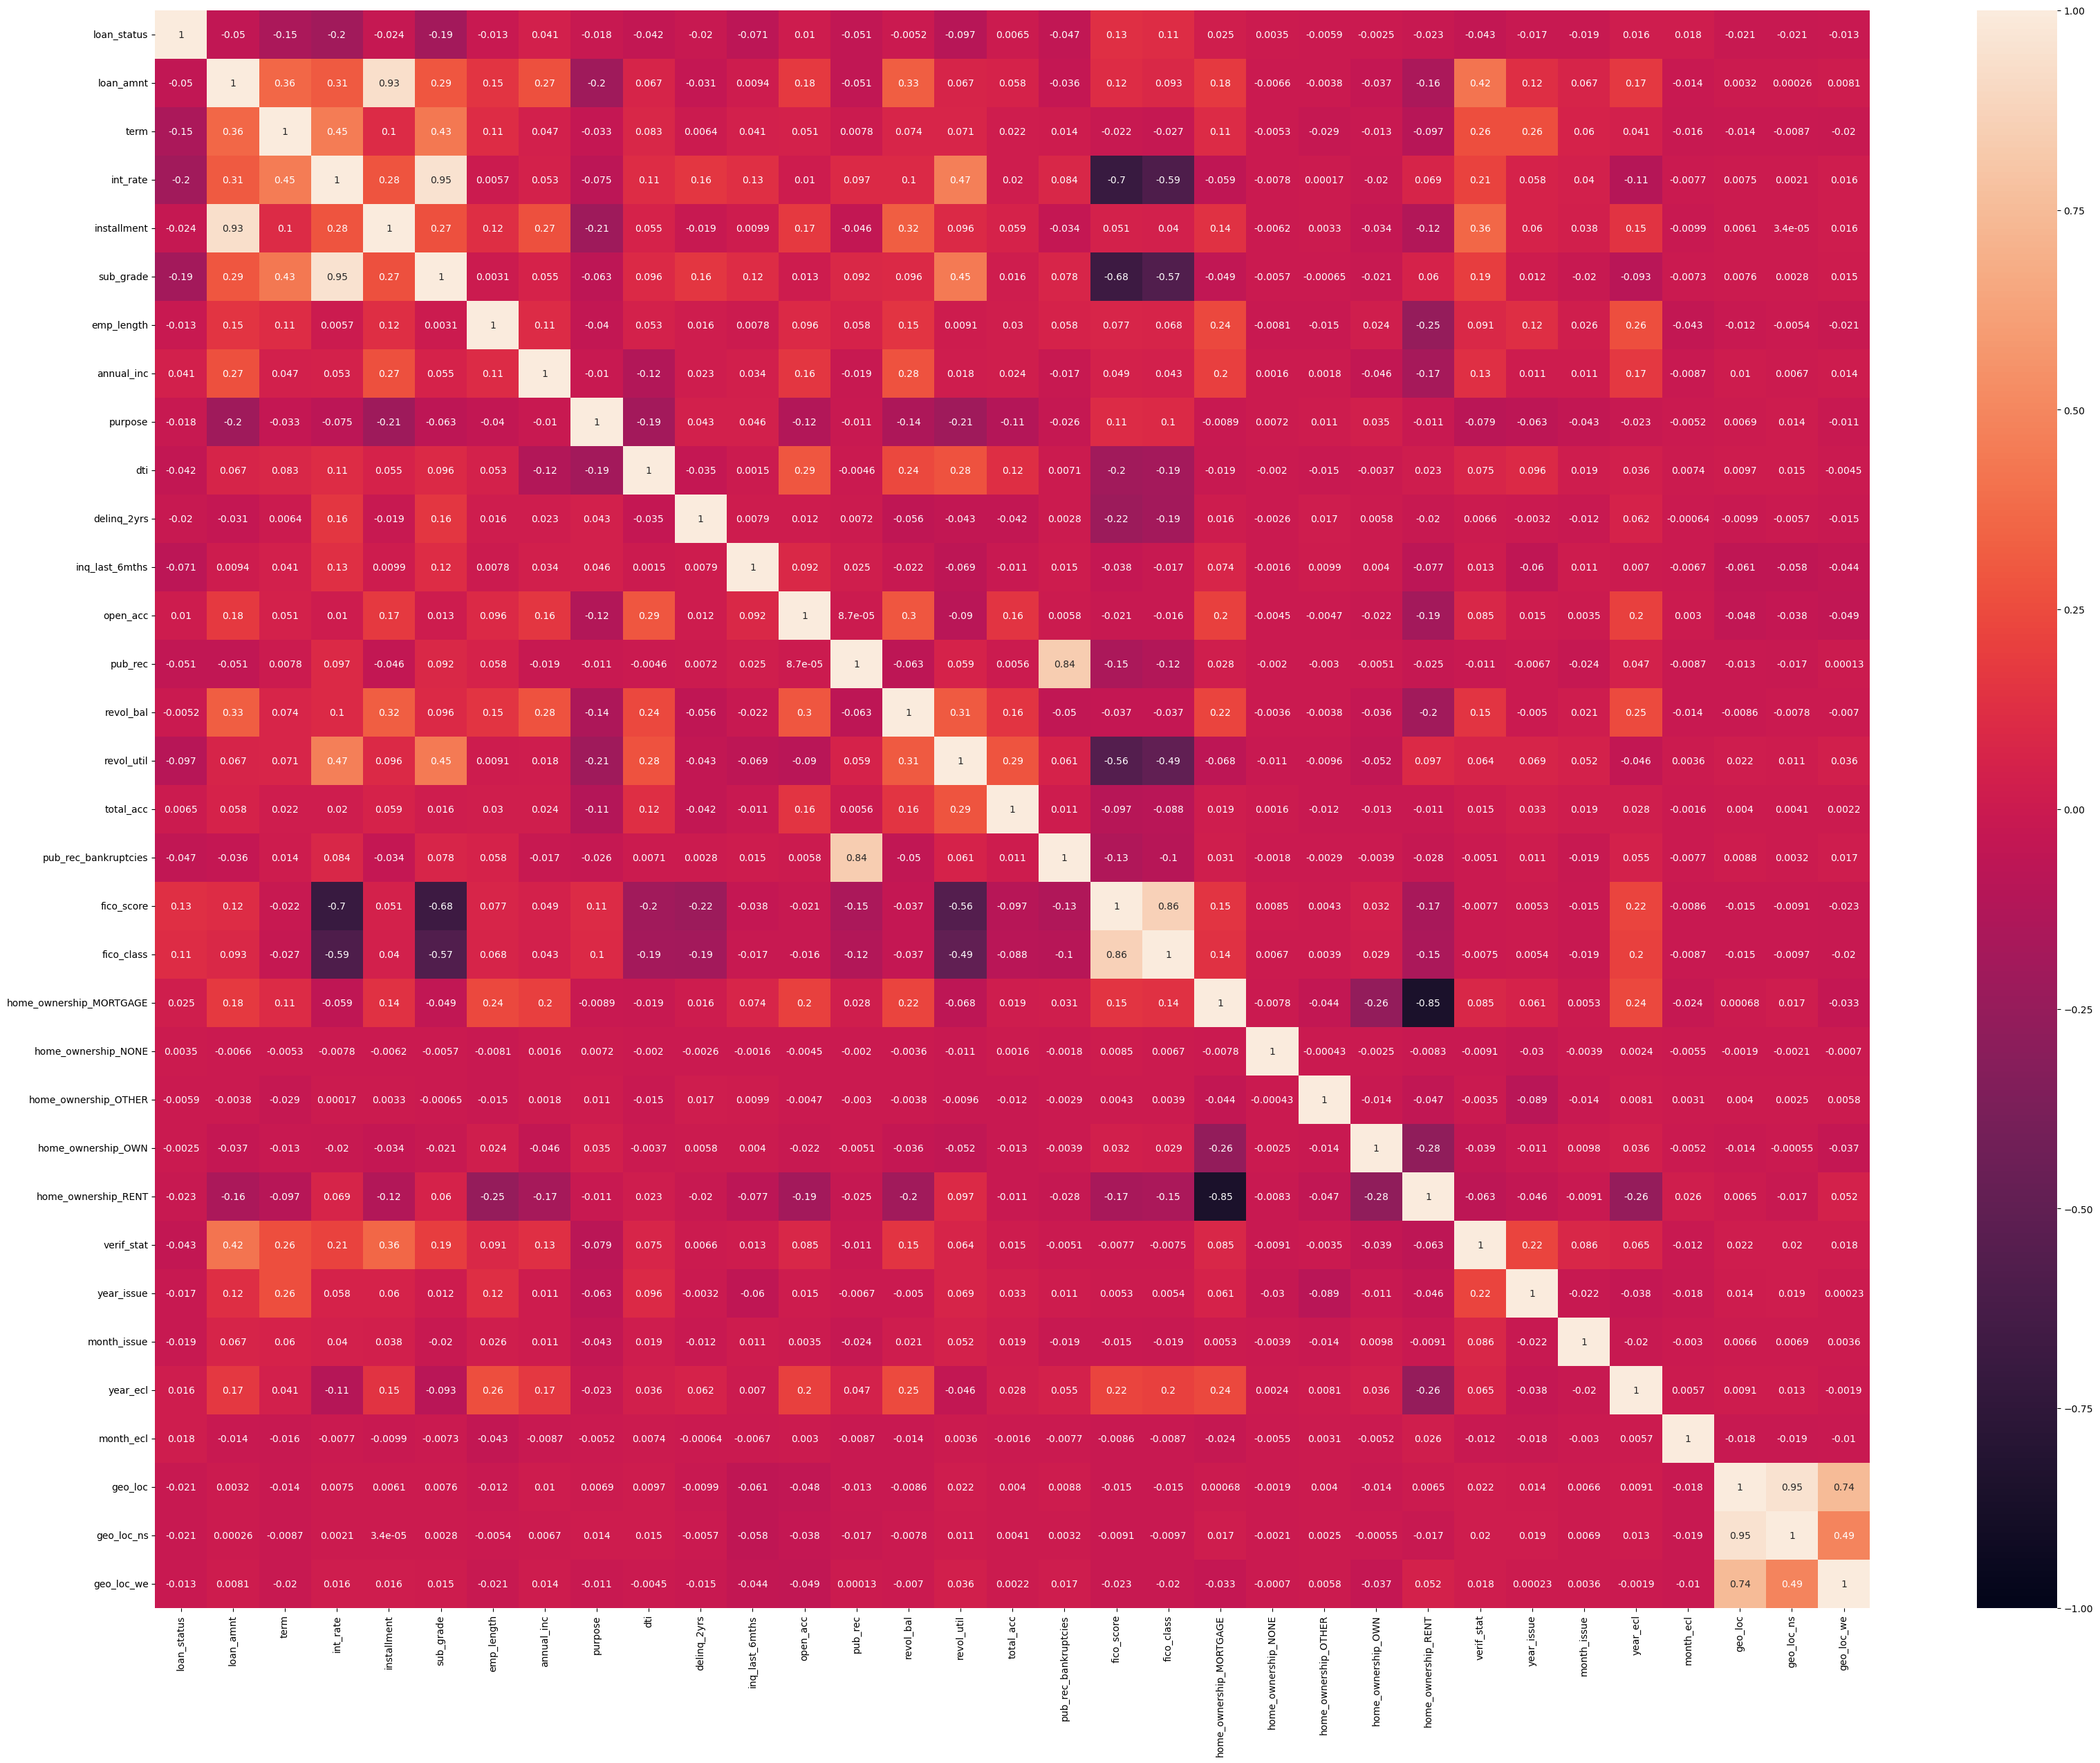

In [112]:
# Checking correlation and using heatmap to visualise it.

plt.figure(figsize = (40,30))       
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)

# Save the heatmap

plt.savefig('Heatmap.png', dpi=300, bbox_inches='tight')

In [114]:
# Exporting the new DataFrame to .csv file.

df.to_csv('Part_3.csv', index = False)